### Data Preparation

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:


# Load datasets
train = pd.read_csv("training_set_VU_DM.csv")
test = pd.read_csv("test_set_VU_DM.csv")

# Add flags
train['istrain'] = 1
train['istest'] = 0

test['istrain'] = 0
test['istest'] = 1

# Combine
df = pd.concat([train, test], ignore_index=True)

# Check shape
print(f"Combined dataframe shape: {df.shape}")

# Optionally check flags count
print(df['istrain'].value_counts())
print(df['istest'].value_counts())


Combined dataframe shape: (9917530, 56)
istrain
0    4959183
1    4958347
Name: count, dtype: int64
istest
1    4959183
0    4958347
Name: count, dtype: int64


In [3]:
df.columns

Index(['srch_id', 'date_time', 'site_id', 'visitor_location_country_id',
       'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id',
       'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool',
       'prop_location_score1', 'prop_location_score2',
       'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag',
       'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window',
       'srch_adults_count', 'srch_children_count', 'srch_room_count',
       'srch_saturday_night_bool', 'srch_query_affinity_score',
       'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv',
       'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv',
       'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv',
       'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv',
       'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv',
       'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv',
       'comp6_rate_percent_diff', 'comp7_rate'

In [4]:
df = df.astype({col: 'float32' for col in df.select_dtypes('float64').columns})
# Downcast integer columns to int32
int_cols = df.select_dtypes(include=['int64']).columns
df[int_cols] = df[int_cols].astype('int32')

In [5]:
# Print all the columns for further feature study
print("Columns in the dataset:")
print(df.columns.tolist())

Columns in the dataset:
['srch_id', 'date_time', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate

In [6]:
# Count missing values and calculate percentage of missing values for each column
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})

# Filter only columns with missing values, sorted by percentage descending
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

missing_df

,Missing Count,Missing Percentage
gross_bookings_usd,9779140,98.604592
comp1_rate_percent_diff,9732623,98.135554
comp6_rate_percent_diff,9724218,98.050805
comp1_rate,9681724,97.622331
comp1_inv,9663097,97.434512
comp4_rate_percent_diff,9653317,97.335899
comp7_rate_percent_diff,9639692,97.198516
comp6_rate,9435043,95.135008
visitor_hist_starrating,9412233,94.905012
visitor_hist_adr_usd,9409918,94.881669


In [7]:
# Filter rows where comp1_rate and comp1_inv are not null
filtered = df[(df['comp4_rate'].notna()) & (df['comp4_inv'].notna()) &(df['comp4_rate_percent_diff'].isna())]

# Select only the relevant columns
relevant_columns = ['comp4_rate', 'comp4_inv', 'price_usd', 'comp4_rate_percent_diff']

# Print the relevant columns from the filtered rows
print(filtered[relevant_columns])


         comp4_rate  comp4_inv   price_usd  comp4_rate_percent_diff
180             0.0        0.0   71.139999                      NaN
188             0.0        0.0   20.110001                      NaN
189             0.0        0.0   24.740000                      NaN
195             0.0        0.0   54.130001                      NaN
198             0.0        0.0   72.690002                      NaN
...             ...        ...         ...                      ...
9917137         0.0        0.0  259.000000                      NaN
9917140         0.0        0.0  279.000000                      NaN
9917143         0.0        0.0  259.000000                      NaN
9917148         0.0        0.0  299.000000                      NaN
9917152         0.0        0.0  269.000000                      NaN

[355886 rows x 4 columns]


In [8]:
for i in range(1, 9):
    rate_col = f'comp{i}_rate'
    diff_col = f'comp{i}_rate_percent_diff'
    
    if rate_col in df.columns and diff_col in df.columns:
        # Before replacement stats
        missing_before = df[diff_col].isnull().sum()
        print(f"[comp{i}] Before: {missing_before} missing in {diff_col}")
        
        # Replace NaN in compX_rate_percent_diff with 0.0 where compX_rate == 0
        df.loc[(df[rate_col] == 0) & (df[diff_col].isna()), diff_col] = 0.0
        
        # After replacement stats
        missing_after = df[diff_col].isnull().sum()
        percent_missing = (missing_after / len(df)) * 100
        print(f"[comp{i}] After: {missing_after} missing ({percent_missing:.4f}%) in {diff_col}")


[comp1] Before: 9732623 missing in comp1_rate_percent_diff
[comp1] After: 9681724 missing (97.6223%) in comp1_rate_percent_diff
[comp2] Before: 8807683 missing in comp2_rate_percent_diff
[comp2] After: 5876897 missing (59.2577%) in comp2_rate_percent_diff
[comp3] Before: 8973523 missing in comp3_rate_percent_diff
[comp3] After: 6858257 missing (69.1529%) in comp3_rate_percent_diff
[comp4] Before: 9653317 missing in comp4_rate_percent_diff
[comp4] After: 9297431 missing (93.7474%) in comp4_rate_percent_diff
[comp5] Before: 8236524 missing in comp5_rate_percent_diff
[comp5] After: 5473236 missing (55.1875%) in comp5_rate_percent_diff
[comp6] Before: 9724218 missing in comp6_rate_percent_diff
[comp6] After: 9435043 missing (95.1350%) in comp6_rate_percent_diff
[comp7] Before: 9639692 missing in comp7_rate_percent_diff
[comp7] After: 9286453 missing (93.6368%) in comp7_rate_percent_diff
[comp8] Before: 8691823 missing in comp8_rate_percent_diff
[comp8] After: 6098487 missing (61.4920%) in 

In [9]:
# Aggregating competitor rate percent diffs (signed)
signed_diff_df = pd.DataFrame()
comp_cheaper = []
comp_expensive = []
comp_same = []
comp_unavail = []

# Track which compX_rate columns were used (to count NaNs later)
used_rate_cols = []

for i in range(1, 9):
    rate_col = f'comp{i}_rate'
    diff_col = f'comp{i}_rate_percent_diff'
    inv_col = f'comp{i}_inv'
    
    if rate_col in df.columns and diff_col in df.columns:
        print(f"Adding signed_diff_{i} = {diff_col} * {rate_col}")
        signed_diff_df[f'signed_diff_{i}'] = df[diff_col] * df[rate_col]
        used_rate_cols.append(rate_col)

        comp_cheaper.append((df[rate_col] == -1).astype(int))
        comp_expensive.append((df[rate_col] == 1).astype(int))
        comp_same.append((df[rate_col] == 0).astype(int))
        
    if inv_col in df.columns:
        comp_unavail.append((df[inv_col] == 1).astype(int))

# Compute row-wise average of signed diffs, ignoring NaNs
df['avg_comp_price_diff'] = signed_diff_df.mean(axis=1, skipna=True)

# Optional: mark rows where all signed diffs are NaN
df['no_comp_price_info'] = signed_diff_df.isna().all(axis=1).astype(int)

# Count-based competitor features
df['sum_comp_cheaper'] = np.sum(comp_cheaper, axis=0)
df['sum_comp_same_price'] = np.sum(comp_same, axis=0)
df['sum_comp_more_expensive'] = np.sum(comp_expensive, axis=0)
df['sum_comp_inv'] = np.sum(comp_unavail, axis=0)

# Count of missing values across all compX_rate columns
df['comp_info_unavailable_count'] = df[used_rate_cols].isna().sum(axis=1)


Adding signed_diff_1 = comp1_rate_percent_diff * comp1_rate
Adding signed_diff_2 = comp2_rate_percent_diff * comp2_rate
Adding signed_diff_3 = comp3_rate_percent_diff * comp3_rate
Adding signed_diff_4 = comp4_rate_percent_diff * comp4_rate
Adding signed_diff_5 = comp5_rate_percent_diff * comp5_rate
Adding signed_diff_6 = comp6_rate_percent_diff * comp6_rate
Adding signed_diff_7 = comp7_rate_percent_diff * comp7_rate
Adding signed_diff_8 = comp8_rate_percent_diff * comp8_rate


In [10]:
# Count how many rows have NaN in avg_comp_price_diff
num_missing = df['avg_comp_price_diff'].isna().sum()
print(f"Number of rows with NaN avg_comp_price_diff: {num_missing}")

# Show rows where avg_comp_price_diff is NaN and all comp info unavailable
missing_rows = df[df['avg_comp_price_diff'].isna() & (df['comp_info_unavailable_count'] == 8)]
print(missing_rows.shape[0])


Number of rows with NaN avg_comp_price_diff: 3444424
3444424


In [11]:
df['avg_comp_price_diff']= df['avg_comp_price_diff'].fillna(0)

In [12]:
# Identify columns with more than 95% missing values
missing_info = df.isnull().mean()
high_missing_cols = missing_info[missing_info > 0.51].index.tolist()

# Keep columns we plan to use in feature engineering
to_keep = ['visitor_hist_starrating', 'visitor_hist_adr_usd', 'srch_query_affinity_score']
drop_cols = [col for col in high_missing_cols if col not in to_keep]

# Drop only the truly unwanted high-missing columns
df = df.drop(columns=drop_cols)
print("Shape after dropping high-missing columns:", df.shape)


Shape after dropping high-missing columns: (9917530, 38)


In [13]:
# Count missing values and calculate percentage of missing values for each column
missing_values = df.isnull().sum()
missing_percent = (missing_values / len(df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percent
})

# Filter only columns with missing values, sorted by percentage descending
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

missing_df

,Missing Count,Missing Percentage
visitor_hist_starrating,9412233,94.905012
visitor_hist_adr_usd,9409918,94.881669
srch_query_affinity_score,9281966,93.591509
position,4959183,50.004215
click_bool,4959183,50.004215
booking_bool,4959183,50.004215
orig_destination_distance,3216461,32.432077
prop_location_score2,2178380,21.964945
prop_review_score,14630,0.147517


In [14]:
# Add indicator for missing history
df['has_booking_history'] = (~df['visitor_hist_adr_usd'].isna()).astype(int)

df['visitor_hist_adr_usd'] = df['visitor_hist_adr_usd'].fillna(-1)
df['visitor_hist_starrating'] = df['visitor_hist_starrating'].fillna(-1)


In [15]:
# Add missing flag
df['has_affinity_score'] = (~df['srch_query_affinity_score'].isna()).astype(int)

# Fill missing with low score
df['srch_query_affinity_score'] = df['srch_query_affinity_score'].fillna(-10)


In [16]:
comp_cols = [col for col in df.columns if 'comp' in col]
# Add target columns to correlation list
target_cols = ['click_bool', 'booking_bool']

# Subset the DataFrame to only comp-related + target columns
comp_corr_df = df[comp_cols + target_cols]

# Compute correlations
comp_corr = comp_corr_df.corr()

# Show correlation of comp features with click_bool and booking_bool
print("Correlation with click_bool:")
print(comp_corr['click_bool'].sort_values(ascending=False))

print("\nCorrelation with booking_bool:")
print(comp_corr['booking_bool'].sort_values(ascending=False))


Correlation with click_bool:
click_bool                     1.000000
booking_bool                   0.782889
sum_comp_more_expensive        0.015205
no_comp_price_info             0.003453
comp_info_unavailable_count    0.003431
avg_comp_price_diff            0.000644
sum_comp_inv                  -0.001123
sum_comp_same_price           -0.005400
sum_comp_cheaper              -0.011540
Name: click_bool, dtype: float64

Correlation with booking_bool:
booking_bool                   1.000000
click_bool                     0.782889
sum_comp_more_expensive        0.019234
sum_comp_same_price            0.003909
sum_comp_inv                   0.000343
avg_comp_price_diff            0.000112
sum_comp_cheaper              -0.007496
comp_info_unavailable_count   -0.008423
no_comp_price_info            -0.010230
Name: booking_bool, dtype: float64


In [17]:

# Fill remaining lower-missing numerical features with median
df['orig_destination_distance'] = df['orig_destination_distance'].fillna(df['orig_destination_distance'].median())
df['prop_location_score2'] = df['prop_location_score2'].fillna(df['prop_location_score2'].median())
df['prop_review_score'] = df['prop_review_score'].fillna(df['prop_review_score'].median())

In [18]:
# Check data types
df.dtypes

srch_id                          int32
date_time                       object
site_id                          int32
visitor_location_country_id      int32
visitor_hist_starrating        float32
visitor_hist_adr_usd           float32
prop_country_id                  int32
prop_id                          int32
prop_starrating                  int32
prop_review_score              float32
prop_brand_bool                  int32
prop_location_score1           float32
prop_location_score2           float32
prop_log_historical_price      float32
position                       float32
price_usd                      float32
promotion_flag                   int32
srch_destination_id              int32
srch_length_of_stay              int32
srch_booking_window              int32
srch_adults_count                int32
srch_children_count              int32
srch_room_count                  int32
srch_saturday_night_bool         int32
srch_query_affinity_score      float32
orig_destination_distance

0.0 19726328.0


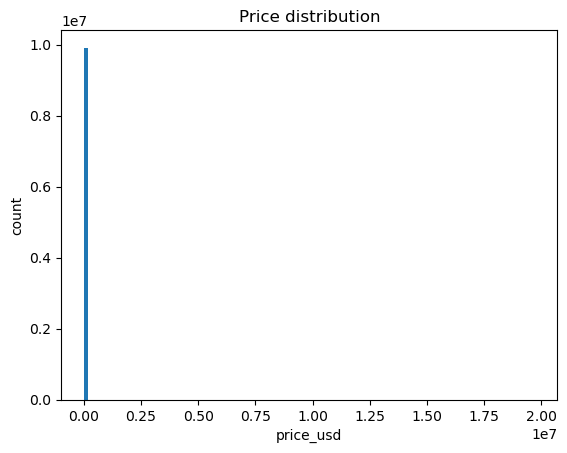

In [19]:
print(df['price_usd'].min(), df['price_usd'].max())

# Check price_usd distribution
plt.hist(df['price_usd'], bins=100)
plt.title("Price distribution")
plt.xlabel("price_usd")
plt.ylabel("count")
plt.show()

In [20]:
# Check booking rate
booking_rate = train['booking_bool'].mean()
click_rate = train['click_bool'].mean()

print(f"Booking rate: {booking_rate:.4f}")
print(f"Click rate: {click_rate:.4f}")

Booking rate: 0.0279
Click rate: 0.0447


In [21]:
# Check how many hotels for each search_id?
srch_counts = df.groupby('srch_id')['prop_id'].count()
print(srch_counts.describe())

count    279430.000000
mean         35.492002
std          16.399390
min           5.000000
25%          26.000000
50%          32.000000
75%          47.000000
max          72.000000
Name: prop_id, dtype: float64


In [22]:
# Convert to datetime format
df['date_time'] = pd.to_datetime(df['date_time'], errors='coerce')

# Extract year, month, day, weekday, hour
df['search_year'] = df['date_time'].dt.year
df['search_month'] = df['date_time'].dt.month
df['search_day'] = df['date_time'].dt.day
df['search_weekday'] = df['date_time'].dt.weekday  # 0 = Monday
df['search_hour'] = df['date_time'].dt.hour

# Create weekend indicator (1 if Saturday or Sunday)
df['search_is_weekend'] = df['search_weekday'].isin([5, 6]).astype(int)

In [23]:
df['price_usd']

0          104.769997
1          170.740005
2          179.800003
3          602.770020
4          143.580002
              ...    
9917525     66.070000
9917526     67.099998
9917527     73.910004
9917528     66.070000
9917529     82.059998
Name: price_usd, Length: 9917530, dtype: float32

In [24]:
# Clip price values at an upper bound to reduce outlier effect
df['price_usd'] = df['price_usd'].clip(upper=5000)

# Add a log-transformed version of price
df['price_usd_log'] = np.log1p(df['price_usd'])


In [25]:
df['srch_query_affinity_score'].isna().sum()

0

### Feature engineering

In [26]:
# 1. Combined target: click + booking
df['click_or_book'] = df['click_bool'] + 5 * df['booking_bool']

# 2. Discount-related features
df['price_discount'] = df['prop_log_historical_price'] - np.log1p(df['price_usd'])
df['has_discount'] = (df['price_discount'] > 0).astype(int)

# 3. Normalized price
stay_nights = df['srch_length_of_stay'].replace(0, np.nan)
group_size = (df['srch_adults_count'] + df['srch_children_count']).replace(0, np.nan)
df['price_per_night_per_person'] = df['price_usd'] / (stay_nights * group_size)

# 4. Promotion flag
df['is_promotion'] = df['promotion_flag'].fillna(0).astype(int)

# 5. Saturday night flag & star interaction
df['includes_saturday'] = df['srch_saturday_night_bool'].fillna(0).astype(int)
df['sat_night_star_combo'] = df['srch_saturday_night_bool'] * df['prop_starrating']

# 6. Interaction features
df['star_price_interaction'] = df['prop_starrating'] * df['prop_log_historical_price']
df['starrating_diff'] = df['prop_starrating'] - df['visitor_hist_starrating']
df['price_diff_vs_history'] = df['price_usd'] - df['visitor_hist_adr_usd']

# 7. Location and review features
df['location_score_sum'] = df['prop_location_score1'] + df['prop_location_score2']
df['log_distance'] = np.log1p(df['orig_destination_distance'])
df['prop_review_score_squared'] = df['prop_review_score'] ** 2

# 8. Hotel popularity
hotel_freq = df['prop_id'].value_counts().to_dict()
df['hotel_freq'] = df['prop_id'].map(hotel_freq)

# 9. User affinity
df['srch_query_affinity_score'] = df['srch_query_affinity_score'].fillna(df['srch_query_affinity_score'].median())
df['affinity_rank'] = df.groupby('srch_id')['srch_query_affinity_score'].rank(ascending=False)



# 11. Ranking features
df['price_rank'] = df.groupby('srch_id')['price_per_night_per_person'].rank(method='min', ascending=True)
df['star_rank'] = df.groupby('srch_id')['prop_starrating'].rank(method='min', ascending=True)
df['review_rank'] = df.groupby('srch_id')['prop_review_score'].rank(method='min', ascending=True)


df['is_cheapest'] = (df['price_rank'] == 1).astype(int)
df['is_best_rating'] = (df.groupby('srch_id')['prop_review_score'].transform('max') == df['prop_review_score']).astype(int)

In [27]:
print(train.columns.tolist())

['srch_id', 'date_time', 'site_id', 'visitor_location_country_id', 'visitor_hist_starrating', 'visitor_hist_adr_usd', 'prop_country_id', 'prop_id', 'prop_starrating', 'prop_review_score', 'prop_brand_bool', 'prop_location_score1', 'prop_location_score2', 'prop_log_historical_price', 'position', 'price_usd', 'promotion_flag', 'srch_destination_id', 'srch_length_of_stay', 'srch_booking_window', 'srch_adults_count', 'srch_children_count', 'srch_room_count', 'srch_saturday_night_bool', 'srch_query_affinity_score', 'orig_destination_distance', 'random_bool', 'comp1_rate', 'comp1_inv', 'comp1_rate_percent_diff', 'comp2_rate', 'comp2_inv', 'comp2_rate_percent_diff', 'comp3_rate', 'comp3_inv', 'comp3_rate_percent_diff', 'comp4_rate', 'comp4_inv', 'comp4_rate_percent_diff', 'comp5_rate', 'comp5_inv', 'comp5_rate_percent_diff', 'comp6_rate', 'comp6_inv', 'comp6_rate_percent_diff', 'comp7_rate', 'comp7_inv', 'comp7_rate_percent_diff', 'comp8_rate', 'comp8_inv', 'comp8_rate_percent_diff', 'click_b

In [28]:
'''# Set general style
sns.set(style='whitegrid')
plt.rcParams['figure.figsize'] = (8, 5)

# Distribution Plots
fig, axs = plt.subplots(1, 2, figsize=(16, 5))

sns.histplot(df['price_usd_log'], bins=50, kde=True, ax=axs[0])
axs[0].set_title('log(price_usd) Distribution')

sns.histplot(np.log1p(df['orig_destination_distance']), bins=50, kde=True, ax=axs[1])
axs[1].set_title('log(orig_destination_distance) Distribution')

for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()

# Boxplots
fig, axs = plt.subplots(3, 4, figsize=(28, 12))

# Row 1: Basic hotel and interest features
# log(price_usd)
sns.boxplot(x='booking_bool', y='price_usd_log', data=df, ax=axs[0, 0])
axs[0, 0].set_title('log(price_usd) vs Booking')

# location_score_sum
sns.boxplot(x='booking_bool', y='location_score_sum', data=df, ax=axs[0, 1])
axs[0, 1].set_title('Location Score vs Booking')

# review_score
sns.boxplot(x='booking_bool', y='prop_review_score', data=df, ax=axs[0, 2])
axs[0, 2].set_title('Review Score vs Booking')

# affinity_score
sns.boxplot(x='booking_bool', y='srch_query_affinity_score', data=df, ax=axs[0, 3])
axs[0, 3].set_title('Affinity Score vs Booking')

# Row 2: Pricing and ranking features
# Normalized price per person per night and its relation to booking
sns.boxplot(x='booking_bool', y='price_per_night_per_person', data=df, ax=axs[1, 0])
axs[1, 0].set_title('Price Per Person vs Booking')
axs[1, 0].set_ylim(0, 1000)

# Average price difference compared to competitors
sns.boxplot(x='booking_bool', y='avg_comp_price_diff', data=df, ax=axs[1, 1])
axs[1, 1].set_title('Avg Comp Price Difference vs Booking')
axs[1, 1].set_ylim(-100, 100)

# Does star rating rank (within search group) influence booking?
sns.boxplot(x='booking_bool', y='star_rank', data=df, ax=axs[1, 2])
axs[1, 2].set_title('Star Rank vs Booking')

# Is the lowest-priced hotel in the group booked more often?
sns.boxplot(x='booking_bool', y='price_rank', data=df, ax=axs[1, 3])
axs[1, 3].set_title('Price Rank vs Booking')

# Match with user history
# Does the hotel match the user's historical star rating preference?
sns.boxplot(x='booking_bool', y='starrating_diff', data=df, ax=axs[2, 0])
axs[2, 0].set_title('Star Rating Diff vs Booking')

# Price deviation from user's historical average payment
sns.boxplot(x='booking_bool', y='price_diff_vs_history', data=df, ax=axs[2, 1])
axs[2, 1].set_title('Price Diff vs History vs Booking')

# How frequently the hotel appears in the data (popularity)
sns.boxplot(x='booking_bool', y='hotel_freq', data=df, ax=axs[2, 2])
axs[2, 2].set_title('Hotel Frequency vs Booking')
axs[2, 2].set_ylim(0, 300)

# Empty placeholder
axs[2, 3].axis('off')

for row in axs:
    for ax in row:
        ax.set_xlabel('Booking')

plt.tight_layout()
plt.show()

# Barplots - 5 behavior-related features
fig, axs = plt.subplots(1, 5, figsize=(30, 5))

# 1. Booking Rate by Promotion
grouped1 = df.groupby('is_promotion')['booking_bool'].mean().reset_index()
sns.barplot(x='is_promotion', y='booking_bool', data=grouped1, ax=axs[0])
axs[0].set_title('Booking Rate by Promotion')
axs[0].set_ylim(0, 0.1)

# 2. Booking Rate by Includes Saturday
grouped2 = df.groupby('includes_saturday')['booking_bool'].mean().reset_index()
sns.barplot(x='includes_saturday', y='booking_bool', data=grouped2, ax=axs[1])
axs[1].set_title('Booking Rate by Includes Saturday')
axs[1].set_ylim(0, 0.1)

# 3. Click Rate by Promotion
grouped3 = df.groupby('is_promotion')['click_bool'].mean().reset_index()
sns.barplot(x='is_promotion', y='click_bool', data=grouped3, ax=axs[2])
axs[2].set_title('Click Rate by Promotion')
axs[2].set_ylim(0, 0.15)

# 4. Count of is_cheapest
sns.countplot(x='is_cheapest', data=df, ax=axs[3])
axs[3].set_title('Count of is_cheapest')

# 5. Booking Rate by Best Rating
grouped_best = df.groupby('is_best_rating')['booking_bool'].mean().reset_index()
sns.barplot(x='is_best_rating', y='booking_bool', data=grouped_best, ax=axs[4])
axs[4].set_title('Booking Rate by Best Rating')
axs[4].set_ylim(0, 0.1)

for ax in axs:
    ax.set_xlabel('')
    ax.set_ylabel('')

plt.tight_layout()
plt.show()
'''


"# Set general style\nsns.set(style='whitegrid')\nplt.rcParams['figure.figsize'] = (8, 5)\n\n# Distribution Plots\nfig, axs = plt.subplots(1, 2, figsize=(16, 5))\n\nsns.histplot(df['price_usd_log'], bins=50, kde=True, ax=axs[0])\naxs[0].set_title('log(price_usd) Distribution')\n\nsns.histplot(np.log1p(df['orig_destination_distance']), bins=50, kde=True, ax=axs[1])\naxs[1].set_title('log(orig_destination_distance) Distribution')\n\nfor ax in axs:\n    ax.set_xlabel('')\n    ax.set_ylabel('')\n\nplt.tight_layout()\nplt.show()\n\n# Boxplots\nfig, axs = plt.subplots(3, 4, figsize=(28, 12))\n\n# Row 1: Basic hotel and interest features\n# log(price_usd)\nsns.boxplot(x='booking_bool', y='price_usd_log', data=df, ax=axs[0, 0])\naxs[0, 0].set_title('log(price_usd) vs Booking')\n\n# location_score_sum\nsns.boxplot(x='booking_bool', y='location_score_sum', data=df, ax=axs[0, 1])\naxs[0, 1].set_title('Location Score vs Booking')\n\n# review_score\nsns.boxplot(x='booking_bool', y='prop_review_scor

In [29]:
'''
# Heatmap: numeric feature correlations
numeric_feats = df.select_dtypes(include='number').drop(columns=['click_bool', 'booking_bool'])
corr = numeric_feats.corr()

plt.figure(figsize=(14, 12))
sns.heatmap(corr, cmap='coolwarm', center=0, linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()
'''

'\n# Heatmap: numeric feature correlations\nnumeric_feats = df.select_dtypes(include=\'number\').drop(columns=[\'click_bool\', \'booking_bool\'])\ncorr = numeric_feats.corr()\n\nplt.figure(figsize=(14, 12))\nsns.heatmap(corr, cmap=\'coolwarm\', center=0, linewidths=0.5)\nplt.title("Feature Correlation Heatmap")\nplt.show()\n'

In [30]:
# Final check for missing values in the dataset
missing_counts = train.isnull().sum()
missing_percent = (missing_counts / len(train)) * 100

missing_summary = pd.DataFrame({
    'MissingCount': missing_counts,
    'MissingPercent': missing_percent
})

# Filter to show only columns with missing values
missing_summary = missing_summary[missing_summary['MissingCount'] > 0].sort_values(by='MissingPercent', ascending=False)

# Display result
if not missing_summary.empty:
    print("Missing values detected:")
    display(missing_summary)
else:
    print("No missing values. Data clean for modeling.")

Missing values detected:


,MissingCount,MissingPercent
comp1_rate_percent_diff,4863908,98.095353
comp6_rate_percent_diff,4862173,98.060362
comp1_rate,4838417,97.581250
comp1_inv,4828788,97.387053
comp4_rate_percent_diff,4827261,97.356256
gross_bookings_usd,4819957,97.208949
comp7_rate_percent_diff,4819832,97.206428
comp6_rate,4718190,95.156511
visitor_hist_starrating,4706481,94.920364
visitor_hist_adr_usd,4705359,94.897735


In [31]:

import pandas as pd

# Sample the data — adjust n depending on your RAM
sampled_df = df.sample(n=100_000, random_state=42)

# Your existing correlation function
def print_high_correlations_pairwise(df, threshold=0.8):
    numeric_df = df.select_dtypes(include='number')
    cols = numeric_df.columns
    already_seen = set()

    for i in range(len(cols)):
        for j in range(i+1, len(cols)):
            col1, col2 = cols[i], cols[j]
            corr = numeric_df[[col1, col2]].corr().iloc[0, 1]
            if abs(corr) >= threshold:
                print(f"{col1} and {col2} are correlated {corr*100:.0f}%")

# Run it on the sampled data
print_high_correlations_pairwise(sampled_df, threshold=0.8)


visitor_hist_starrating and visitor_hist_adr_usd are correlated 89%
visitor_hist_starrating and has_booking_history are correlated 98%
visitor_hist_adr_usd and has_booking_history are correlated 86%
prop_review_score and prop_review_score_squared are correlated 95%
prop_location_score1 and location_score_sum are correlated 100%
prop_log_historical_price and price_discount are correlated 95%
prop_log_historical_price and star_price_interaction are correlated 81%
price_usd and price_diff_vs_history are correlated 97%
promotion_flag and is_promotion are correlated 100%
srch_saturday_night_bool and includes_saturday are correlated 100%
srch_saturday_night_bool and sat_night_star_combo are correlated 91%
click_bool and click_or_book are correlated 84%
booking_bool and click_or_book are correlated 99%
istrain and istest are correlated -100%
no_comp_price_info and comp_info_unavailable_count are correlated 82%
sum_comp_same_price and comp_info_unavailable_count are correlated -83%
search_year

In [32]:
features_to_drop = [
    'visitor_hist_starrating',
    'visitor_hist_adr_usd',
    'prop_review_score_squared',
    'location_score_sum',
    'price_discount',
    'star_price_interaction',
    'price_diff_vs_history',
    'is_promotion',
    'includes_saturday',
    'sat_night_star_combo',
    'no_comp_price_info',
    'search_year'
]
df = df.drop(columns=features_to_drop)

In [33]:
df = df.astype({col: 'float32' for col in df.select_dtypes('float64').columns})
# Downcast integer columns to int32
int_cols = df.select_dtypes(include=['int64']).columns
df[int_cols] = df[int_cols].astype('int32')

In [34]:
from sklearn.preprocessing import LabelEncoder
import gc

# --------- 1. LABEL ENCODE low/medium cardinality categorical features ---------
label_cols = [
    'site_id',
    'visitor_location_country_id',
    'prop_country_id',
    'srch_destination_id'
]

for col in label_cols:
    if df[col].dtype.name in ['object', 'category']:
        df[col] = df[col].astype('category')
    le = LabelEncoder()
    # Use str conversion only if needed
    if not pd.api.types.is_numeric_dtype(df[col]):
        df[col] = le.fit_transform(df[col].astype(str))
    else:
        df[col] = le.fit_transform(df[col])
    gc.collect()



# --------- 3. DROP position feature (leaks into test set) ---------
if 'position' in df.columns:
    df.drop(columns=['position'], inplace=True)
df.drop(columns=['date_time'], inplace=True)


# --------- 5. ENSURE binary flags are clean ints ---------
binary_cols = [
    'promotion_flag', 'prop_brand_bool', 'random_bool',
    'is_promotion', 'has_discount', 'is_cheapest', 'is_best_rating',
    'includes_saturday', 'has_booking_history',
    'has_affinity_score', 'no_comp_price_info', 'search_is_weekend'
]

for col in binary_cols:
    if col in df.columns:
        df[col] = df[col].astype(int)

# --------- 6. FILL remaining missing values (safe for tree models) ---------
df.fillna(-1, inplace=True)


In [35]:
from sklearn.model_selection import GroupShuffleSplit

train_df = df[df['istrain'] == 1].copy()
test_df = df[df['istest'] == 1].copy()


gss = GroupShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
groups = train_df['srch_id']

for train_idx, val_idx in gss.split(train_df, groups=groups):
    train_part = train_df.iloc[train_idx].copy()
    val_part = train_df.iloc[val_idx].copy()
train_part['relevance'] = train_part['click_or_book']
val_part['relevance'] = val_part['click_or_book']
exclude_cols = ['srch_id', 'relevance', 'click_or_book', 'click_bool', 'booking_bool', 'istrain', 'istest']
features = [col for col in train_part.columns if col not in exclude_cols]
categorical_features = ['site_id', 'visitor_location_country_id', 'prop_country_id', 
                        'prop_id', 'srch_destination_id']



In [36]:
from catboost import CatBoostRanker, Pool

train_pool = Pool(
    data=train_part[features],
    label=train_part['relevance'],
    group_id=train_part['srch_id'],
    cat_features=categorical_features
)

val_pool = Pool(
    data=val_part[features],
    label=val_part['relevance'],
    group_id=val_part['srch_id'],
    cat_features=categorical_features
)

model = CatBoostRanker(
    iterations=2000,
    learning_rate=0.1,
    depth=6,
    loss_function='YetiRank',
    eval_metric='NDCG:top=5',
    random_seed=42,
    verbose=50
)

model.fit(train_pool, eval_set=val_pool)


Groupwise loss function. OneHotMaxSize set to 10
0:	test: 0.1721990	best: 0.1721990 (0)	total: 2.49s	remaining: 1h 22m 53s
50:	test: 0.3615696	best: 0.3616791 (48)	total: 1m 27s	remaining: 55m 33s
100:	test: 0.3705776	best: 0.3706354 (98)	total: 2m 55s	remaining: 55m 6s
150:	test: 0.3744804	best: 0.3746818 (147)	total: 4m 30s	remaining: 55m 13s
200:	test: 0.3787919	best: 0.3789520 (198)	total: 6m 8s	remaining: 54m 54s
250:	test: 0.3806162	best: 0.3806755 (238)	total: 7m 48s	remaining: 54m 23s
300:	test: 0.3826115	best: 0.3828309 (296)	total: 9m 33s	remaining: 53m 55s
350:	test: 0.3840049	best: 0.3840049 (350)	total: 11m 18s	remaining: 53m 9s
400:	test: 0.3842178	best: 0.3844056 (388)	total: 13m 4s	remaining: 52m 8s
450:	test: 0.3842903	best: 0.3844056 (388)	total: 14m 53s	remaining: 51m 7s
500:	test: 0.3845160	best: 0.3845417 (492)	total: 16m 35s	remaining: 49m 37s
550:	test: 0.3852563	best: 0.3853485 (548)	total: 18m 16s	remaining: 48m 3s
600:	test: 0.3853746	best: 0.3855460 (558)	tot

In [37]:
from sklearn.metrics import ndcg_score

# Predict scores
val_part['pred'] = model.predict(val_pool)

# Compute NDCG@5 per srch_id
scores = []
for srch_id, group in val_part.groupby('srch_id'):
    y_true = [group['relevance'].values]
    y_score = [group['pred'].values]
    score = ndcg_score(y_true, y_score, k=5)
    scores.append(score)

print(f"Mean NDCG@5 on val set: {np.mean(scores):.4f}")


Mean NDCG@5 on val set: 0.3910


In [38]:
model.save_model("catboost_ranker_ndcg382.cbm")


In [41]:
from catboost import CatBoostRanker, Pool

# Use full training data
train_df['relevance'] = train_df['click_or_book']

# Define features (exclude target and meta columns)
exclude_cols = ['srch_id', 'relevance', 'click_or_book', 'click_bool', 'booking_bool', 'istrain', 'istest']
features = [col for col in train_df.columns if col not in exclude_cols]

# Define categorical features
categorical_features = [
    'site_id', 
    'visitor_location_country_id', 
    'prop_country_id', 
    'prop_id', 
    'srch_destination_id'
]

# Sort by search ID to help group-wise ranking
train_df = train_df.sort_values('srch_id').reset_index(drop=True)

# Create full training Pool
full_pool = Pool(
    data=train_df[features],
    label=train_df['relevance'],
    group_id=train_df['srch_id'],
    cat_features=categorical_features
)

# Define the final CatBoost ranking model
final_model = CatBoostRanker(
    iterations=1500,
    learning_rate=0.1,
    depth=6,
    loss_function='YetiRank',
    eval_metric='NDCG:top=5',
    random_seed=42,
    verbose=100,
    one_hot_max_size=10
)

# Train the model on full data
final_model.fit(full_pool)

0:	total: 2.63s	remaining: 1h 5m 45s
100:	total: 3m 50s	remaining: 53m 15s
200:	total: 7m 43s	remaining: 49m 58s
300:	total: 11m 53s	remaining: 47m 20s
400:	total: 16m 6s	remaining: 44m 8s
500:	total: 20m 15s	remaining: 40m 23s
600:	total: 24m 29s	remaining: 36m 38s
700:	total: 28m 42s	remaining: 32m 43s
800:	total: 32m 50s	remaining: 28m 39s
900:	total: 37m 3s	remaining: 24m 38s
1000:	total: 41m 19s	remaining: 20m 36s
1100:	total: 45m 34s	remaining: 16m 30s
1200:	total: 49m 49s	remaining: 12m 24s
1300:	total: 54m 12s	remaining: 8m 17s
1400:	total: 58m 29s	remaining: 4m 8s
1499:	total: 1h 2m 43s	remaining: 0us


In [44]:
final_model.save_model("60percent_1500iter_catboost_ranker_ndcg382.cbm")

In [43]:
test_pool = Pool(
    data=test_df[features],
    group_id=test_df['srch_id'],
    cat_features=categorical_features
)

test_df['pred'] = final_model.predict(test_pool)

# Format for Kaggle submission
submission = test_df.sort_values(['srch_id', 'pred'], ascending=[True, False])[['srch_id', 'prop_id']]
submission.columns = ['srch_id', 'prop_id']
submission.to_csv('submission.csv', index=False)

print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'
